In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import geopandas as gpd


In [97]:
df = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-12-03/tickets.csv')

In [98]:
df.head()

,violation_desc,issue_datetime,fine,issuing_agency,lat,lon,zip_code
0,BUS ONLY ZONE,2017-12-06T12:29:00Z,51,PPA,40.035503,-75.081110,19149.0
1,STOPPING PROHIBITED,2017-10-16T18:03:00Z,51,PPA,40.025712,-75.222495,19127.0
2,OVER TIME LIMIT,2017-11-02T22:09:00Z,26,PPA,40.025792,-75.222557,19127.0
3,OVER TIME LIMIT,2017-11-05T20:19:00Z,26,PPA,40.025898,-75.222708,19127.0
4,STOP PROHIBITED CC,2017-10-17T06:58:00Z,76,PPA,39.956170,-75.166025,19102.0


In [70]:
df_viol_fine = df.groupby('violation_desc')[['fine']].mean().sort_values('fine', ascending=False)#.to_frame()

In [71]:
df_viol_fine

,fine
violation_desc,
COUNTERFEIT HP PERM,1001.0
FRAUD PARK HP SPACE,1001.0
WASH/REPAIR VEH,301.0
UNREG/ABANDONED VEH,301.0
INVALID CONT PERMIT,301.0
...,...
PARK PROHIBITED 04,26.0
PARKED ON BRIDGE 14,26.0
PRIVATE PROPERTY,26.0


Text(0, 0.5, 'Cost [USD]')

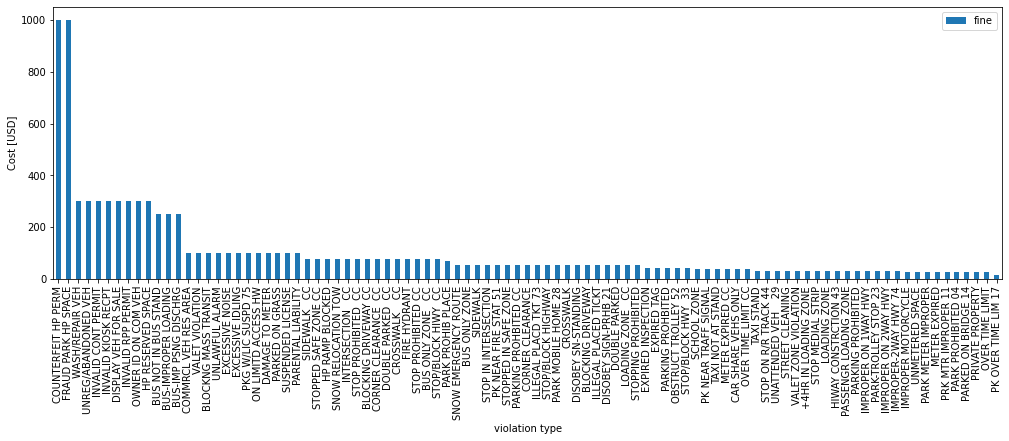

In [72]:
fig, ax = plt.subplots()
df_viol_fine.plot.bar(ax=ax, fontsize=10, figsize=(17,5), rot=90, )
ax.set_xlabel('violation type')
ax.set_ylabel('Cost [USD]')

In [73]:
most_exp_fines = df_viol_fine[df_viol_fine['fine'] >= 1000]
fines_btw_100_and_1000 = df_viol_fine[(df_viol_fine['fine'] < 1000) & (df_viol_fine['fine'] >= 100) ]
fines_btw_50_and_100 = df_viol_fine[(df_viol_fine['fine'] < 100) & (df_viol_fine['fine'] >=50) ]
least_exp_fines = df_viol_fine[df_viol_fine['fine'] < 50 ]

In [74]:
most_exp_fines

,fine
violation_desc,
COUNTERFEIT HP PERM,1001.0
FRAUD PARK HP SPACE,1001.0


In [75]:
fines_btw_100_and_1000

,fine
violation_desc,
WASH/REPAIR VEH,301.0
UNREG/ABANDONED VEH,301.0
INVALID CONT PERMIT,301.0
INVALID KIOSK RECPT,301.0
DISPLAY VEH FOR SALE,301.0
INVALID RPP PERMIT,301.0
OWNER ID ON COM VEH,301.0
HP RESERVED SPACE,301.0
BUS NOT IN BUS STAND,251.0


In [99]:
df_zipcodes = geopandas.read_file('Zipcodes_Poly.geojson')

In [110]:
df_zipcodes.head()

,OBJECTID,CODE,COD,Shape__Area,Shape__Length,geometry
0,1,19120,20,9.177970e+07,49921.544063,"POLYGON ((-75.11107 40.04682, -75.10943 40.045..."
1,2,19121,21,6.959879e+07,39534.887217,"POLYGON ((-75.19227 39.99463, -75.19205 39.994..."
2,3,19122,22,3.591632e+07,24124.645221,"POLYGON ((-75.15406 39.98601, -75.15328 39.985..."
3,4,19123,23,3.585175e+07,26421.728982,"POLYGON ((-75.15190 39.97056, -75.15150 39.970..."
4,5,19124,24,1.448080e+08,63658.770420,"POLYGON ((-75.09660 40.04249, -75.09281 40.039..."


Text(0.5, 1.0, 'Philly Parking Violation Map')

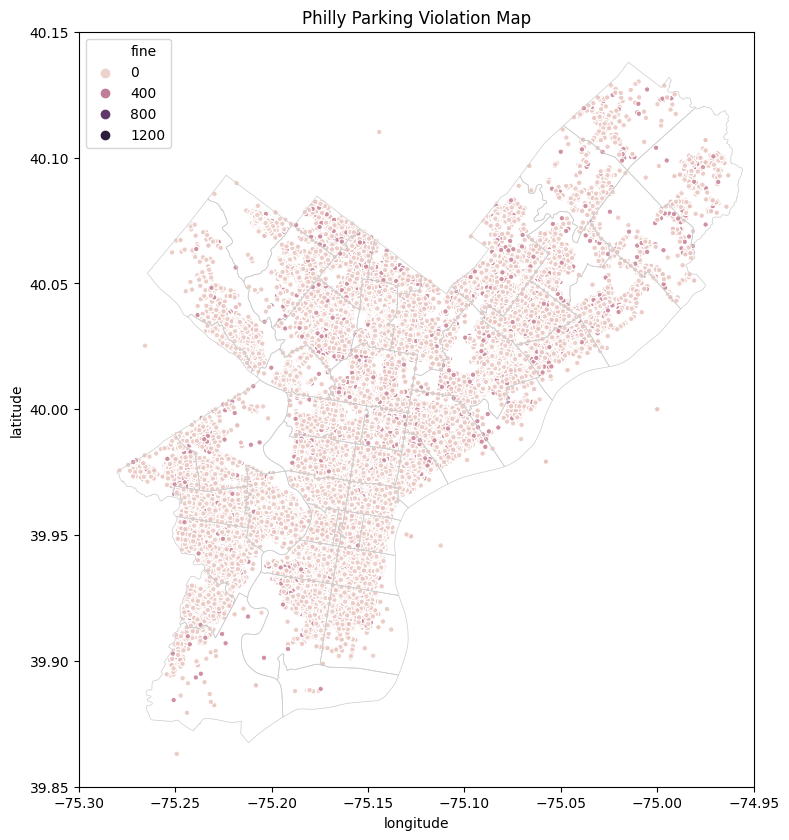

In [170]:
fig, ax = plt.subplots(dpi=100, figsize=(10,10))
df_zipcodes.boundary.plot(ax=ax, lw=.5, edgecolor='0.8')
p = sns.scatterplot(data=df, x='lon', y='lat', ax=ax, s=15, hue=df['fine'])
# ax.legend(title='Avg Fine [USD]')
ax.set_xlim(-75.3, -74.95)
ax.set_ylim(39.85, 40.15)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
ax.set_title('Philly Parking Violation Map')